In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('Transaksi.csv', index_col='tgl_transaksi')
df.head()

,nama_sales,harga_asli,customer,tipe_produk,nama,domisili,usia,name,start_date,end_date,budget
tgl_transaksi,,,,,,,,,,,
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 1,1/1/2021,31/1/2021,"Rp10,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 2,1/2/2021,28/2/2021,"Rp14,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 3,1/3/2021,31/3/2021,"Rp23,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 4,1/4/2021,30/4/2021,"Rp35,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 5,1/5/2021,31/5/2021,"Rp36,000,000.00"


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2258 entries, 2021-02-28 to 2021-04-24
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nama_sales   2258 non-null   object
 1   harga_asli   2170 non-null   object
 2   customer     2258 non-null   object
 3   tipe_produk  2258 non-null   object
 4   nama         2258 non-null   object
 5   domisili     2258 non-null   object
 6   usia         2258 non-null   int64 
 7   name         2258 non-null   object
 8   start_date   2258 non-null   object
 9   end_date     2258 non-null   object
 10  budget       2258 non-null   object
dtypes: int64(1), object(10)
memory usage: 211.7+ KB


In [136]:
# menampilkan jumlah kolom dan baris
df.shape

(2258, 11)

In [138]:
df.isnull().sum()

nama_sales      0
harga_asli     88
customer        0
tipe_produk     0
nama            0
domisili        0
usia            0
name            0
start_date      0
end_date        0
budget          0
dtype: int64

## Data Cleaning
Menghapus null value dan nama kolom yang belum sesuai seperti kolom name, start_date, end_date, budget

In [139]:
# jumlah transaksi setiap tipe produk
df.tipe_produk.value_counts()

Produk E    378
Produk D    362
Produk B    332
Produk F    316
Produk G    314
Produk C    286
Produk A    270
Name: tipe_produk, dtype: int64

In [140]:
# sample produk A, apakah memiliki harga asli yang sama pada tiap transaksi 
df[df.tipe_produk == 'Produk A']

,nama_sales,harga_asli,customer,tipe_produk,nama,domisili,usia,name,start_date,end_date,budget
tgl_transaksi,,,,,,,,,,,
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 1,1/1/2021,31/1/2021,"Rp10,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 2,1/2/2021,28/2/2021,"Rp14,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 3,1/3/2021,31/3/2021,"Rp23,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 4,1/4/2021,30/4/2021,"Rp35,000,000.00"
2021-02-28,Octroy,"Rp41,000.00",Ade,Produk A,Ade,Jawa Barat,42,Campaign 5,1/5/2021,31/5/2021,"Rp36,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,Agus,"Rp6,499,000.00",Mygneo,Produk A,Mygneo,Luar Indonesia,34,Campaign 3,1/3/2021,31/3/2021,"Rp23,000,000.00"
2021-12-05,Agus,"Rp6,499,000.00",Mygneo,Produk A,Mygneo,Luar Indonesia,34,Campaign 4,1/4/2021,30/4/2021,"Rp35,000,000.00"
2021-12-05,Agus,"Rp6,499,000.00",Mygneo,Produk A,Mygneo,Luar Indonesia,34,Campaign 5,1/5/2021,31/5/2021,"Rp36,000,000.00"


Setelah dilakukan pengecekan, didapatkan bahwa setiap transaksi dengan tipe produk yang sama memiliki harga asli yang berbeda. Oleh karena itu null value pada harga_asli akan di drop

In [141]:
df = df.dropna(subset=['harga_asli'])

In [142]:
df.isnull().sum()

nama_sales     0
harga_asli     0
customer       0
tipe_produk    0
nama           0
domisili       0
usia           0
name           0
start_date     0
end_date       0
budget         0
dtype: int64

In [143]:
# mengubah tipe data kolom hasil_asli dari objek menjadi float
df.harga_asli = df.harga_asli.str.replace('Rp', '')
df.harga_asli = df.harga_asli.str.replace(',', '')
df.harga_asli = df.harga_asli.astype(float)

kolom name, start_date, end_date, budget belum sesuai. Untuk sementara di drop

In [144]:
# delete kolom name, start_date, end_date, budget
df.drop(columns=['name','start_date','end_date','budget'], inplace=True)

## EXPLORATORY DATA ANALYSIS

In [145]:
# mengubah index format datetime ke bulan
df.index = df.index.month

In [150]:
# sorting dari bulan 1 ke 12
df.sort_values(by=['tgl_transaksi'], inplace=True)

In [164]:
# table untuk total transaksi setiap bulan
df_total_transaksi_bulan = df.index.value_counts()
df_total_transaksi_bulan = pd.DataFrame(df_total_transaksi_bulan).sort_index(ascending=True)

Text(0.5, 0, 'bulan')

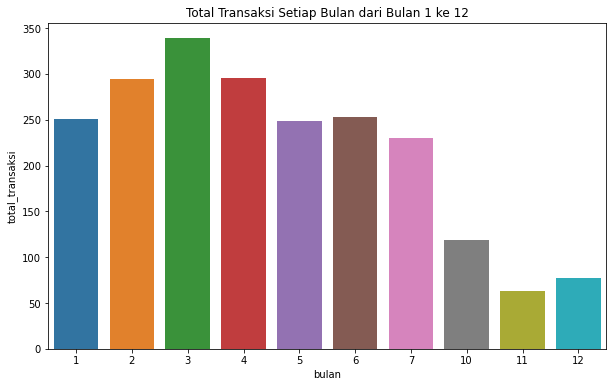

In [170]:
# ukuran chart
plt.figure(figsize=(10,6))

# judul
plt.title('Total Transaksi Setiap Bulan dari Bulan 1 ke 12')

# total transaksi setiap bulan dalam bentuk bar chart
sns.barplot(x=df_total_transaksi_bulan.index, y=df_total_transaksi_bulan.tgl_transaksi)

# penamaan sumbu x dan y
plt.ylabel('total_transaksi')
plt.xlabel('bulan')

Text(0, 0.5, 'total_pendapatan')

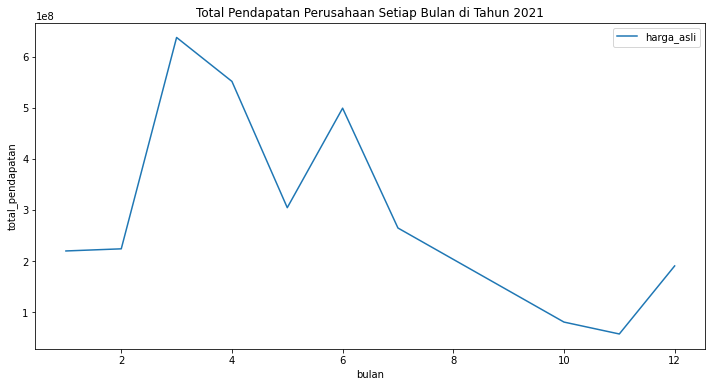

In [241]:
plt.figure(figsize=(12,6))

# total pendapatan setiap bulannya
df_total_pendapatan_bulan = pd.DataFrame(df.groupby(['tgl_transaksi'])['harga_asli'].sum())
sns.lineplot(data=df_total_pendapatan_bulan)

plt.title('Total Pendapatan Perusahaan Setiap Bulan di Tahun 2021')
plt.xlabel('bulan')
plt.ylabel('total_pendapatan')

In [191]:
# input table campaign
df_campaign = pd.read_csv('campaign.csv')
df_campaign

,name,start_date,end_date,budget
0,Campaign 1,1/1/2021,31/1/2021,"Rp10,000,000.00"
1,Campaign 2,1/2/2021,28/2/2021,"Rp14,000,000.00"
2,Campaign 3,1/3/2021,31/3/2021,"Rp23,000,000.00"
3,Campaign 4,1/4/2021,30/4/2021,"Rp35,000,000.00"
4,Campaign 5,1/5/2021,31/5/2021,"Rp36,000,000.00"
5,Campaign 6,1/6/2021,30/6/2021,"Rp30,000,000.00"
6,Campaign 7,1/7/2021,31/7/2021,"Rp37,000,000.00"


In [206]:
# mengubah tipe data kolom end_date dari object menjadi datetime
df_campaign.end_date = pd.to_datetime(df_campaign.end_date)
df_campaign

,name,start_date,end_date,budget
0,Campaign 1,1/1/2021,2021-01-31,"Rp10,000,000.00"
1,Campaign 2,1/2/2021,2021-02-28,"Rp14,000,000.00"
2,Campaign 3,1/3/2021,2021-03-31,"Rp23,000,000.00"
3,Campaign 4,1/4/2021,2021-04-30,"Rp35,000,000.00"
4,Campaign 5,1/5/2021,2021-05-31,"Rp36,000,000.00"
5,Campaign 6,1/6/2021,2021-06-30,"Rp30,000,000.00"
6,Campaign 7,1/7/2021,2021-07-31,"Rp37,000,000.00"


In [209]:
# mengambil bulan dari kolom end_date
# menghapus kolom start_date
df_campaign.end_date = df_campaign.end_date.dt.month
df_campaign.drop(columns=['start_date'], inplace=True)

In [212]:
# mengubah tipe data kolom budget dari objek menjadi float
df_campaign.budget = df_campaign.budget.str.replace('Rp', '')
df_campaign.budget = df_campaign.budget.str.replace(',', '')
df_campaign.budget = df_campaign.budget.astype(float)

In [222]:
# mengubah nama kolom end_date menjadi tgl_transaksi
df_campaign['tgl_transaksi'] = df_campaign.end_date
df_campaign.drop(columns=['end_date'], inplace=True)

In [223]:
df_campaign

,name,budget,tgl_transaksi
0,Campaign 1,10000000.0,1
1,Campaign 2,14000000.0,2
2,Campaign 3,23000000.0,3
3,Campaign 4,35000000.0,4
4,Campaign 5,36000000.0,5
5,Campaign 6,30000000.0,6
6,Campaign 7,37000000.0,7


In [225]:
# merge table total pendapatan perbulan dengan table campaign
df_total_pendapatan_bulan = pd.merge(df_total_pendapatan_bulan, 
                                        df_campaign, 
                                        on='tgl_transaksi', 
                                        how='left')
df_total_pendapatan_bulan

,tgl_transaksi,harga_asli,name,budget
0,1,219572528.0,Campaign 1,10000000.0
1,2,223743184.0,Campaign 2,14000000.0
2,3,637520481.0,Campaign 3,23000000.0
3,4,551497045.0,Campaign 4,35000000.0
4,5,304320950.0,Campaign 5,36000000.0
5,6,499072660.0,Campaign 6,30000000.0
6,7,264506348.0,Campaign 7,37000000.0
7,10,80357200.0,NaN,NaN
8,11,57056993.0,NaN,NaN
9,12,190255555.0,NaN,NaN


Text(0, 0.5, 'total_dana')

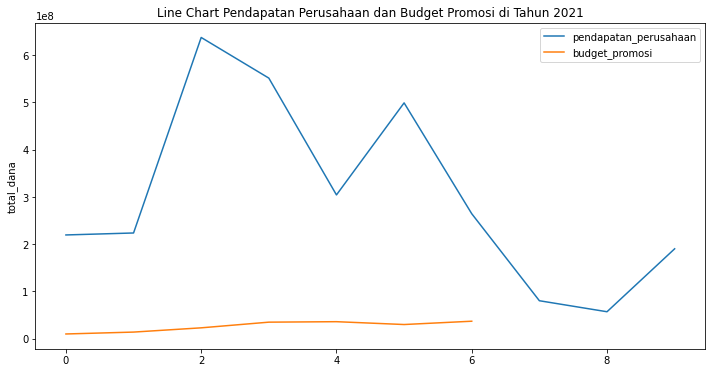

In [239]:
# ukuran chart
plt.figure(figsize=(12,6))

# pendapatan perusahaan dalam line chart
sns.lineplot(data=df_total_pendapatan_bulan.harga_asli,
            label='pendapatan_perusahaan'
            )

# budget promosi perusahaan dalam line chart
sns.lineplot(data=df_total_pendapatan_bulan.budget,
            label='budget_promosi'
            )

plt.title('Line Chart Pendapatan Perusahaan dan Budget Promosi di Tahun 2021')
plt.ylabel('total_dana')

### KESIMPULAN
Dari hasil analysis diatas bisa ditarik kesimpulan bahwa promosi yang dilakukan oleh perusahaan memberikan dampak positif ke total transaksi dan total pendapatan. Sehingga keuntungan yang didapatkan oleh perusahaan melebihi 2,000% saat melakukan promosi.